## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# INTRODUCTION TO DATA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tele_ch=pd.read_csv("/content/Telecom Churn.csv")

In [ ]:

tele_ch

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
tele_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
tele_ch.shape

(3333, 20)

In [ ]:
tele_ch.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
tele_ch.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
tele_ch.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# MISSING DATA

In [ ]:
tele_ch.isnull()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
tele_ch.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
tele_ch.isnull().count().sum()

66660

# Exploratory Data analysis of the Dataset

#Analyzing Churn

In [ ]:
#Printing unique value inside churn column
tele_ch['Churn'].unique()

array([False,  True])

In [ ]:
#Printing the count of true and false in churn column
print(tele_ch.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


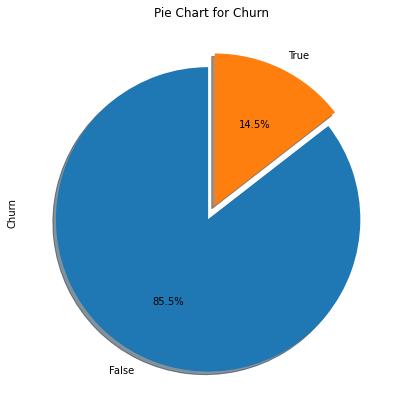

In [ ]:
#To get the pie chart analyze the churn column
tele_ch['Churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',startangle=90,shadow=True,figsize=(7,7))
plt.title('Pie Chart for Churn')
plt.show()

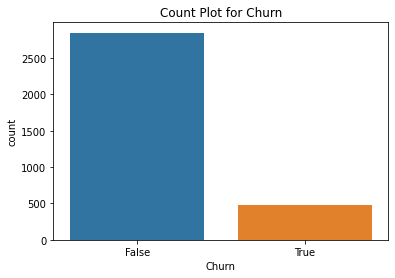

In [ ]:
#To get the Countplot analyze Churn column
plt.title('Count Plot for Churn')
sns.countplot(x='Churn',data=tele_ch);

#Analyzing International plan

In [ ]:
#To get the Count analyze international plan column
international_plan=pd.crosstab(tele_ch['International plan'],tele_ch['Churn'])
international_plan['Percentage churn']=international_plan.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(international_plan)

Churn               False  True  Percentage churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


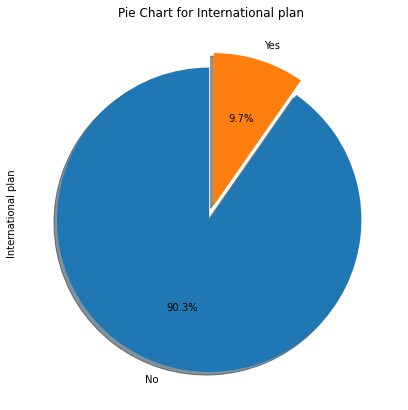

In [ ]:
#To get the pie chart analyze the international plan column
tele_ch['International plan'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',startangle=90,shadow=True,figsize=(7,7))
plt.title('Pie Chart for International plan')
plt.show()

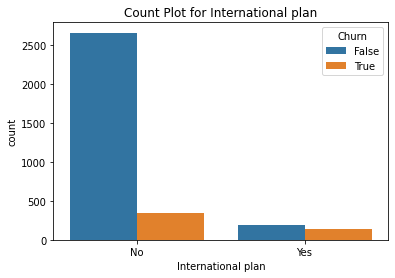

In [ ]:
#To get the Countplot analyze international plan column
plt.title('Count Plot for International plan')
sns.countplot(x='International plan',hue='Churn',data=tele_ch);

## Voice mail plan

In [ ]:
#Printing the count of true and false in voice mail plan column
voice_mail_plan=pd.crosstab(tele_ch['Voice mail plan'],tele_ch['Churn'])
voice_mail_plan['Percentage churn']=voice_mail_plan.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
print(voice_mail_plan)

Churn            False  True  Percentage churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


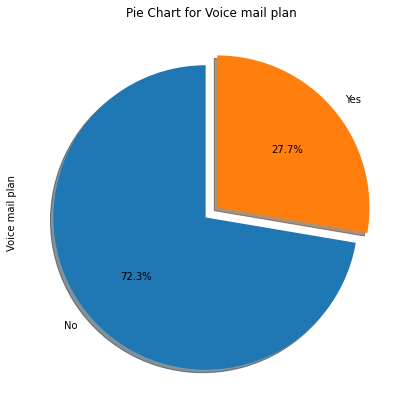

In [ ]:
#To get the pie chart analyze the voice mail plan column
tele_ch['Voice mail plan'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',startangle=90,shadow=True,figsize=(7,7))
plt.title('Pie Chart for Voice mail plan')
plt.show()

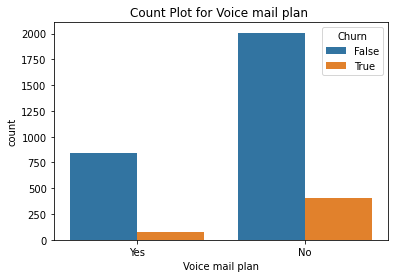

In [ ]:
#To get the Countplot analyze voice mail plan column
plt.title('Count Plot for Voice mail plan ')
sns.countplot(x='Voice mail plan',hue='Churn',data=tele_ch);

In [ ]:
#boxplot 
x=tele_ch[['Total day minutes','Total day calls',	'Total day charge','Total eve minutes','Total eve calls'	,'Total eve charge','Total night minutes','Total night calls','Total night charge',	'Total intl minutes',	'Total intl calls','Total intl charge' ]]

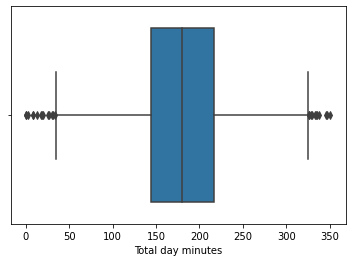

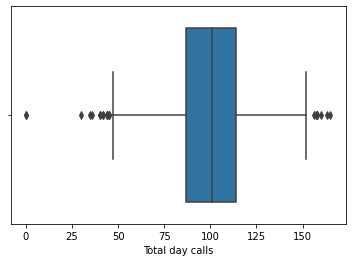

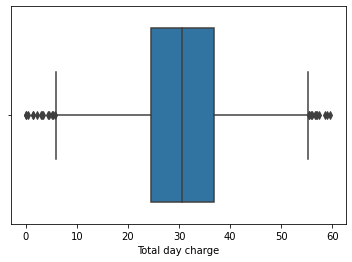

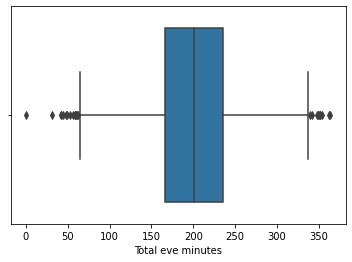

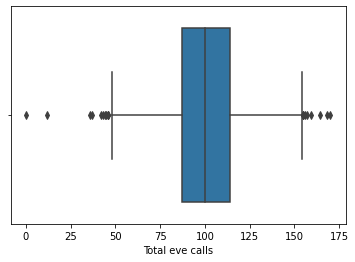

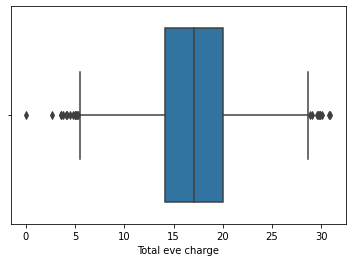

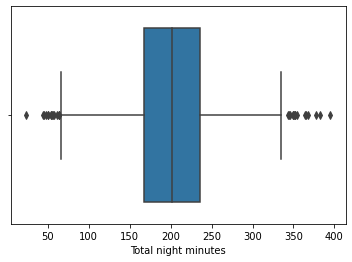

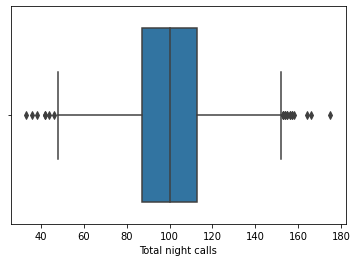

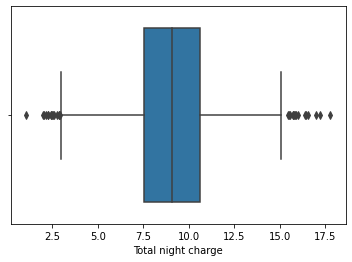

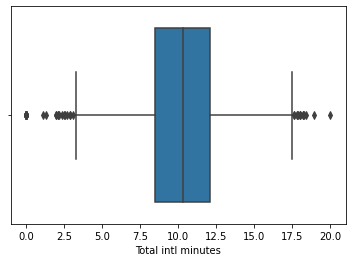

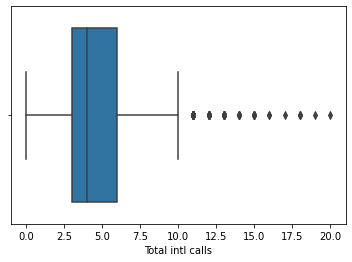

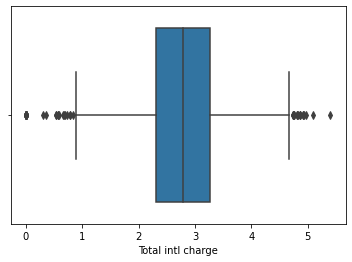

In [ ]:
for i in x.columns:
    sns.boxplot(data=x,x=i) 
    plt.show()   

#Analyzing Customer service calls

In [ ]:
#Printing the unique value of customer service calls
tele_ch['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
tele_ch['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

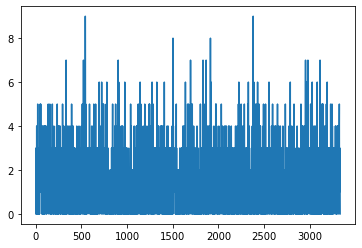

In [ ]:
#To get the plot analyze Customer service calls column
plt.plot(tele_ch['Customer service calls'],)

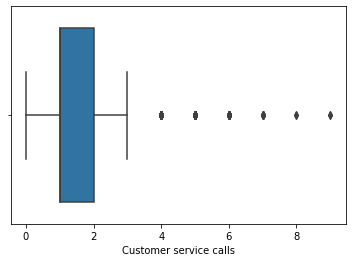

In [ ]:
#Printing the boxplot for customer service calls
sns.boxplot(x='Customer service calls',hue='Churn',data=tele_ch);

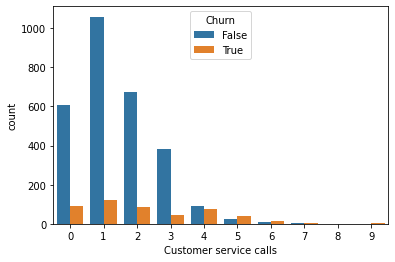

In [ ]:
sns.countplot(x='Customer service calls',hue="Churn",data = tele_ch)

# Analyzing State Column

In [ ]:
#Printng unique value of state column
tele_ch['State'].nunique()

51

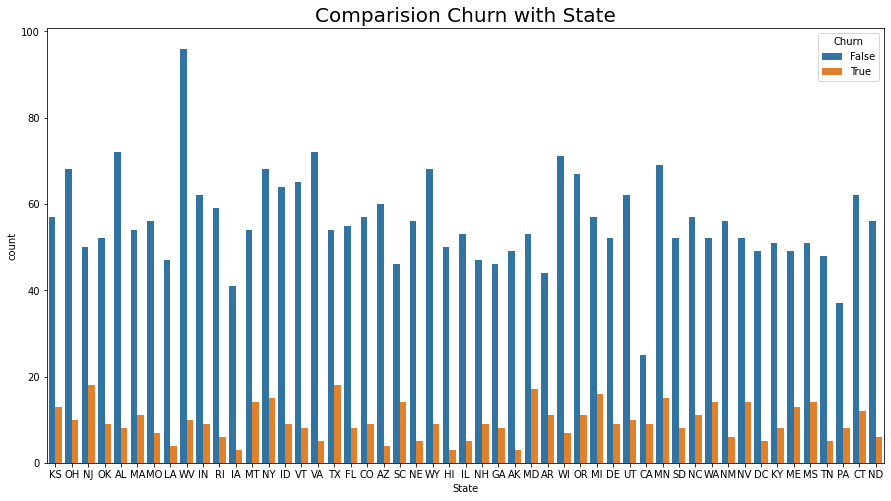

In [ ]:
# Comparision churn with state by using countplot
plt.figure(figsize=(15,8))
plt.title('Comparision Churn with State', fontsize=20)
sns.countplot(x='State',hue='Churn',data=tele_ch);
plt.show()

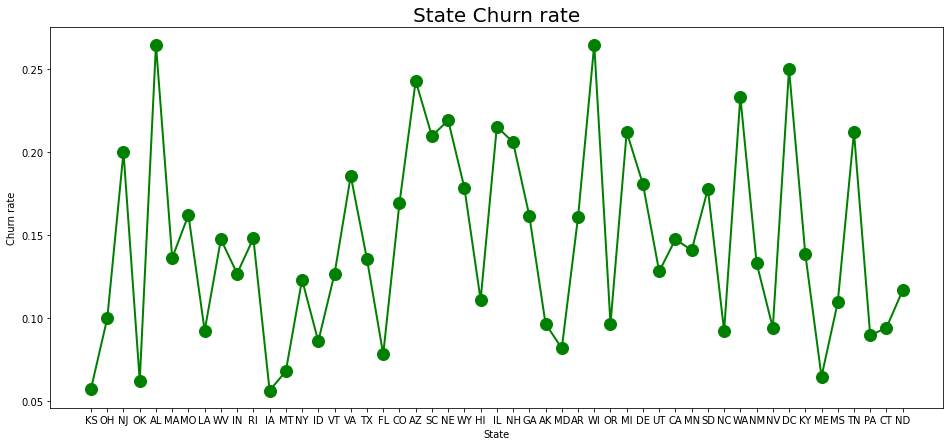

In [ ]:
#To get the unique value analyze state churn rate
plt.figure(figsize=(16,7))
a1=tele_ch['State'].unique()
a2=tele_ch.groupby(['State'])['Churn'].mean()
plt.plot(a1,a2,color='g',marker='o',linewidth=2,markersize=12)
plt.title('State Churn rate', fontsize=20)
plt.xlabel('State')
plt.ylabel('Churn rate')
plt.show()

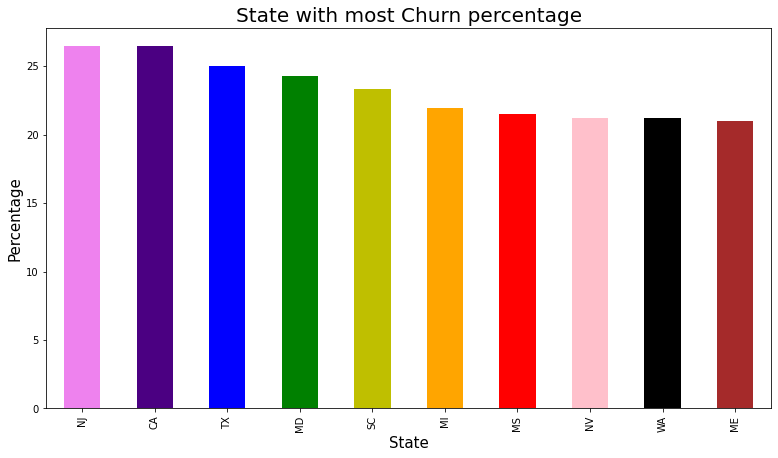

In [ ]:
#We get the percentage let us see top 10 states who are moving towards churn
plt.figure(figsize=(13,7))
((tele_ch.groupby(['State'])['Churn'].mean())*100).sort_values(ascending=False).head(10).plot.bar(color=['violet','indigo','b','g','y','orange','r','pink','black','brown'])
plt.title('State with most Churn percentage',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

In [ ]:
state_CA =tele_ch[tele_ch['State']=='CA']

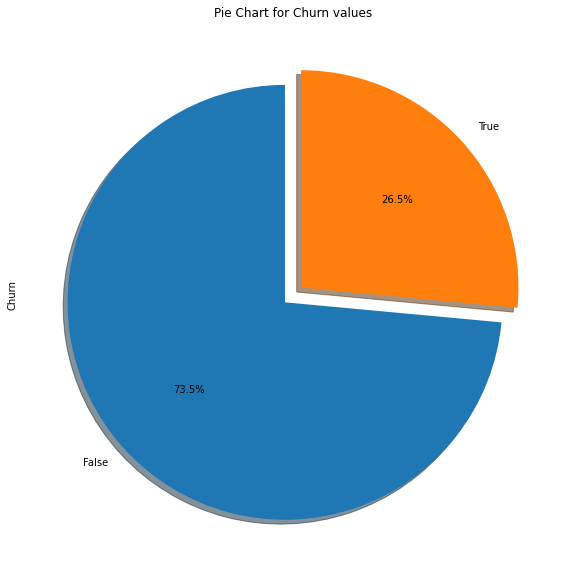

In [ ]:
state_CA ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(10,10))
plt.title('Pie Chart for Churn values')
plt.show()

In [ ]:
tele_ch.groupby(['State'])['Churn'].mean().sort_values(ascending=False).head()

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
Name: Churn, dtype: float64

In [ ]:
tele_ch_df=tele_ch[['State','Account length','Area code','International plan','Voice mail plan','Number vmail messages',
                   'Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls',
                   'Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes',
                  'Total intl calls',	'Total intl charge','Customer service calls',	'Churn']]
                  

In [ ]:
print("abcdef".find("cd"))

2


In [ ]:
corr_tele_ch=tele_ch_df.corr()

In [ ]:
#Printing the correlation of telecom churn dataset
corr_tele_ch

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


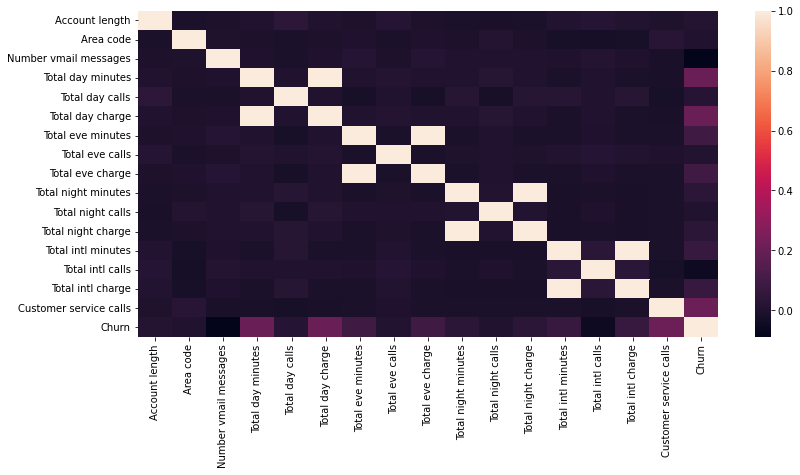

In [ ]:
# Heatmap of Telecom churn analysis
plt.figure(figsize=(13,6))
sns.heatmap(corr_tele_ch)

# For custumers to churn there may be more reasons one of the reason is Rates of calls let us compare all call rate

In [ ]:
avg_total_day_minutes = tele_ch.groupby(['State'])['Total day minutes'].mean()
avg_total_day_minutes

State
AK    178.384615
AL    186.010000
AR    176.116364
AZ    171.604688
CA    183.564706
CO    178.712121
CT    175.140541
DC    171.379630
DE    174.583607
FL    179.533333
GA    185.025926
HI    175.962264
IA    177.613636
ID    178.619178
IL    173.591379
IN    196.525352
KS    191.555714
KY    173.754237
LA    178.376471
MA    180.103077
MD    197.228571
ME    185.262903
MI    180.593151
MN    183.354762
MO    170.506349
MS    177.929231
MT    174.007353
NC    185.145588
ND    187.338710
NE    177.465574
NH    177.328571
NJ    196.225000
NM    171.429032
NV    176.425758
NY    175.114458
OH    183.274359
OK    179.909836
OR    176.246154
PA    188.375556
RI    167.478462
SC    166.441667
SD    189.690000
TN    175.771698
TX    181.516667
UT    183.569444
VA    177.244156
VT    182.031507
WA    178.742424
WI    179.130769
WV    173.950943
WY    180.170130
Name: Total day minutes, dtype: float64

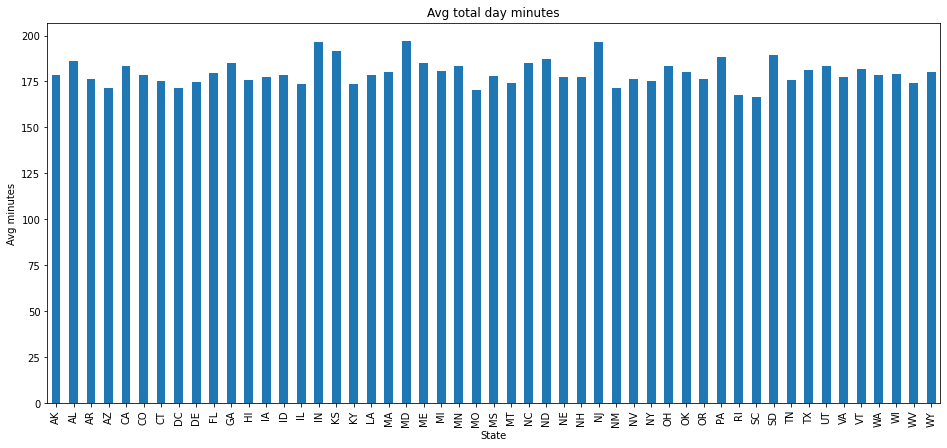

In [ ]:
plt.figure(figsize=(16,7))
avg_total_day_minutes.plot(kind='bar')
plt.title('Avg total day minutes')
plt.ylabel('Avg minutes')
plt.xlabel('State')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
avg_total_minutes = tele_ch.groupby(['State'])['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'].mean()
print(avg_total_minutes)

       Total day minutes  Total eve minutes  Total night minutes  \
State                                                              
AK            178.384615         184.282692           192.326923   
AL            186.010000         195.462500           187.285000   
AR            176.116364         201.047273           205.454545   
AZ            171.604688         187.748437           194.004687   
CA            183.564706         198.970588           198.508824   
CO            178.712121         206.884848           189.898485   
CT            175.140541         203.828378           205.997297   
DC            171.379630         196.272222           206.348148   
DE            174.583607         208.247541           203.900000   
FL            179.533333         210.276190           196.147619   
GA            185.025926         204.140741           193.746296   
HI            175.962264         191.343396           203.713208   
IA            177.613636         206.400000     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


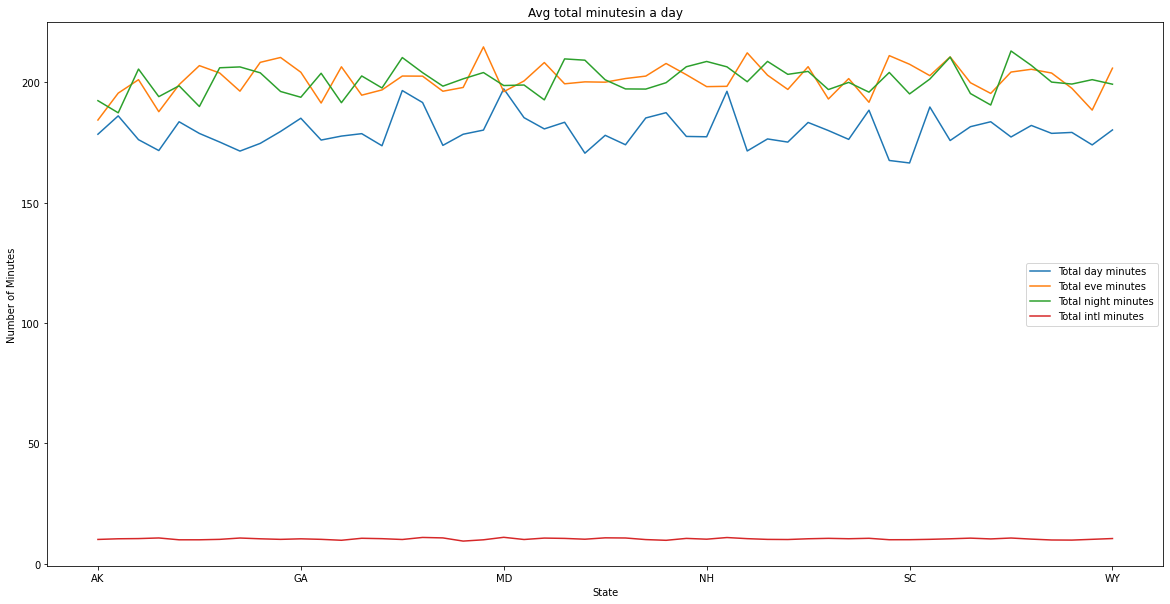

In [ ]:
avg_total_minutes.plot()

plt.title('Avg total minutesin a day')
plt.ylabel('Number of Minutes')
plt.xlabel('State')
plt.rcParams['figure.figsize'] = (20, 10)

**From the graph below we can see Revenue for company means which type of day charge generates more revenue. The line for International calls is as bottom from this we can say Price for International calls is high but due to low usage Revenue generated is low**

In [ ]:
avg_total_value = tele_ch.groupby(['State'])['Total day charge','Total eve charge','Total night charge', 'Total intl charge'].mean()
print(avg_total_value)

       Total day charge  Total eve charge  Total night charge  \
State                                                           
AK            30.325769         15.664231            8.654808   
AL            31.621500         16.614500            8.427875   
AR            29.940000         17.089636            9.245818   
AZ            29.173125         15.958906            8.730625   
CA            31.206176         16.913529            8.932941   
CO            30.381818         17.584848            8.546061   
CT            29.774324         17.325946            9.270405   
DC            29.135370         16.684074            9.285741   
DE            29.680164         17.701311            9.175574   
FL            30.521429         17.873651            8.826508   
GA            31.455185         17.352222            8.718519   
HI            29.913019         16.263774            9.166792   
IA            30.195455         17.544318            8.617955   
ID            30.365753  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

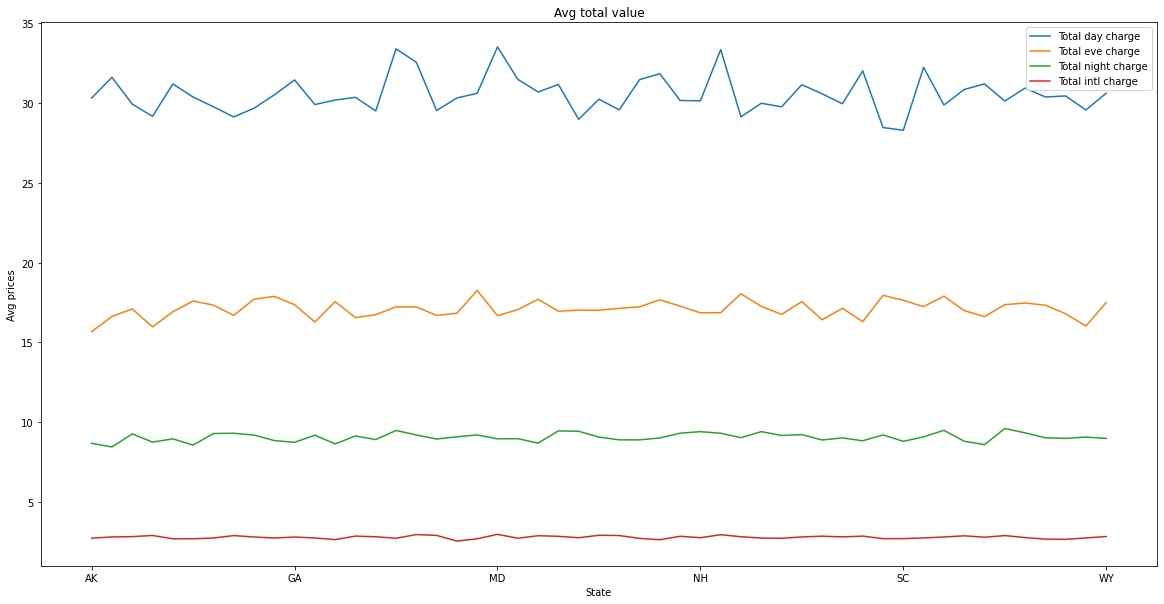

In [ ]:
avg_total_value.plot()
plt.title('Avg total value')
plt.ylabel('Avg prices')
plt.xlabel('State')

#Let see relation between churn and Total day minutes, Total eve minutes, Total night minutes and Total intl minutes with respect to Churn by scatter plot

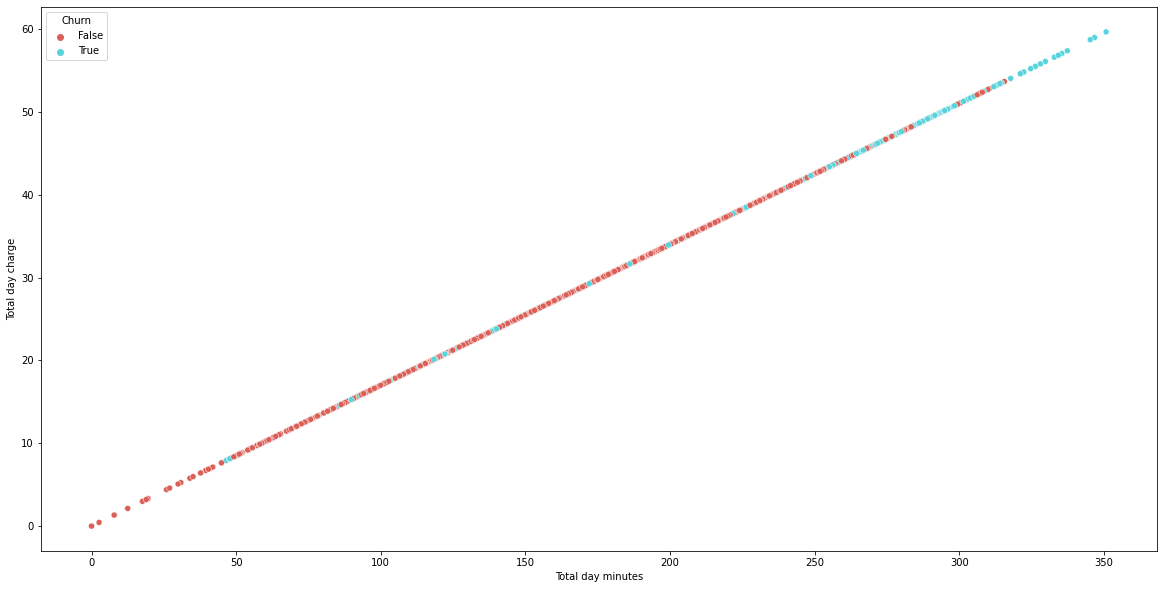

In [ ]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data= tele_ch,palette='hls')

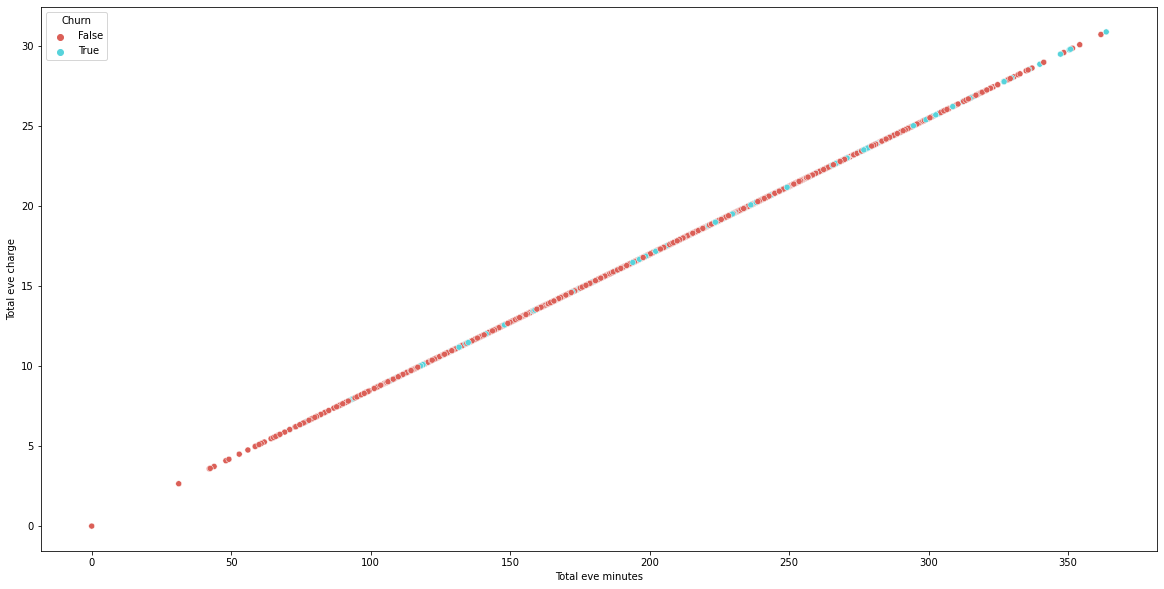

In [ ]:
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data= tele_ch,palette='hls')

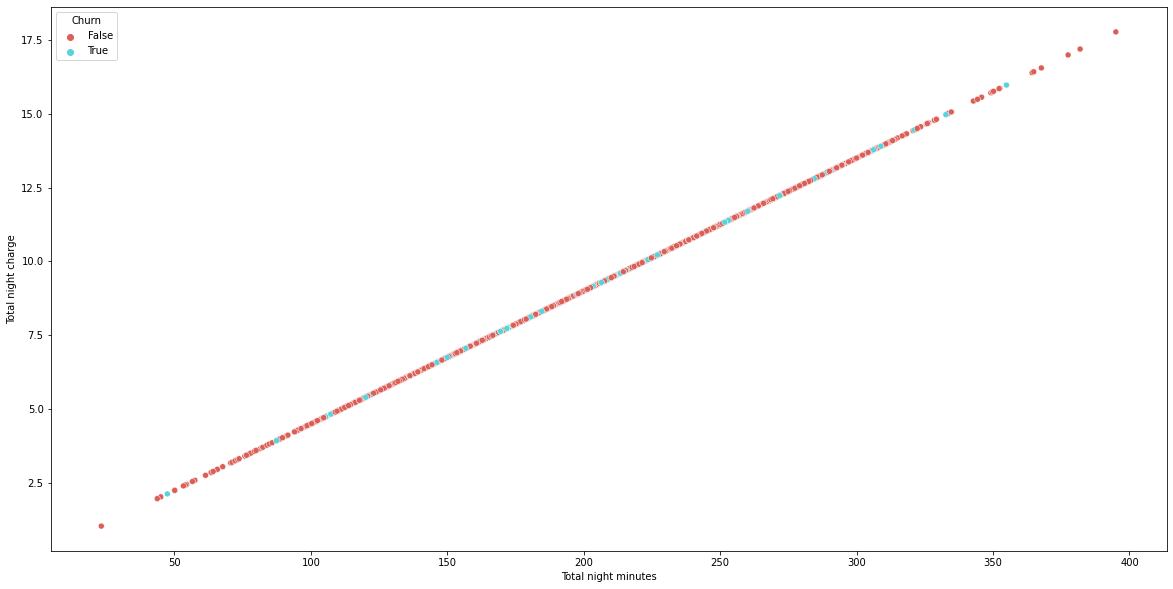

In [ ]:
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data= tele_ch,palette='hls')

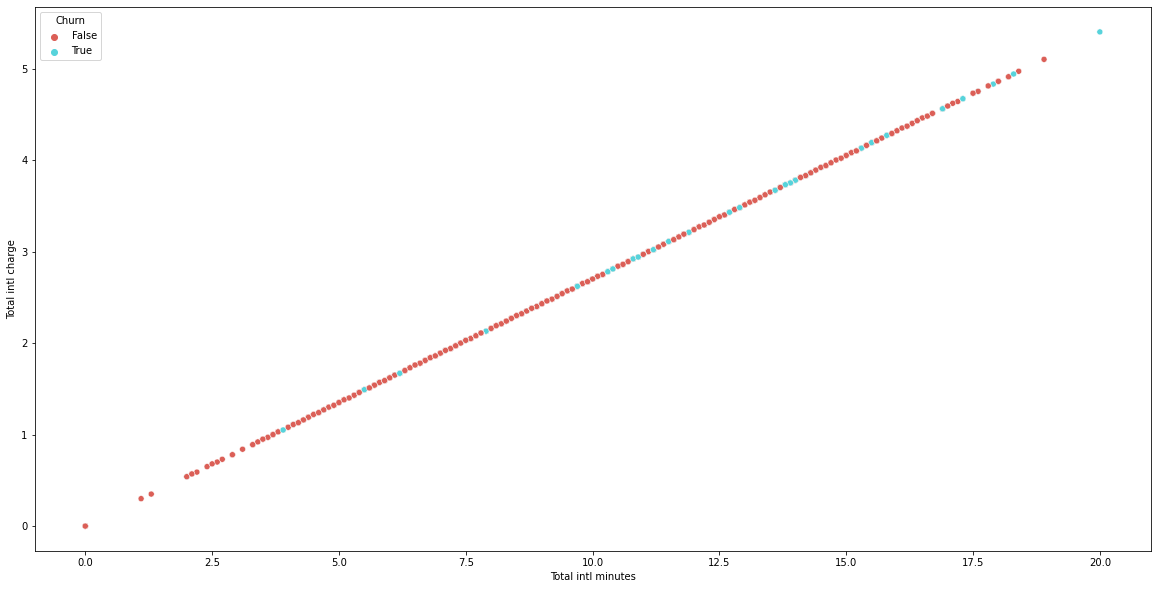

In [ ]:
sns.scatterplot(x="Total intl minutes", y="Total intl charge", hue="Churn", data= tele_ch,palette='hls')

#By creating a function in between x and y we can manipulate many columns**

In [ ]:

def diff_bar(x,y):
    
    tele_ch.groupby([x,y]).size().unstack(level=-1).plot(kind='bar',figsize=(35,10))
    plt.xlabel('x',fontsize = 25)
    plt.ylabel('count',fontsize = 25)
    plt.legend(loc=0,fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("Analyzing State Column",fontsize = 40)
    plt.show()

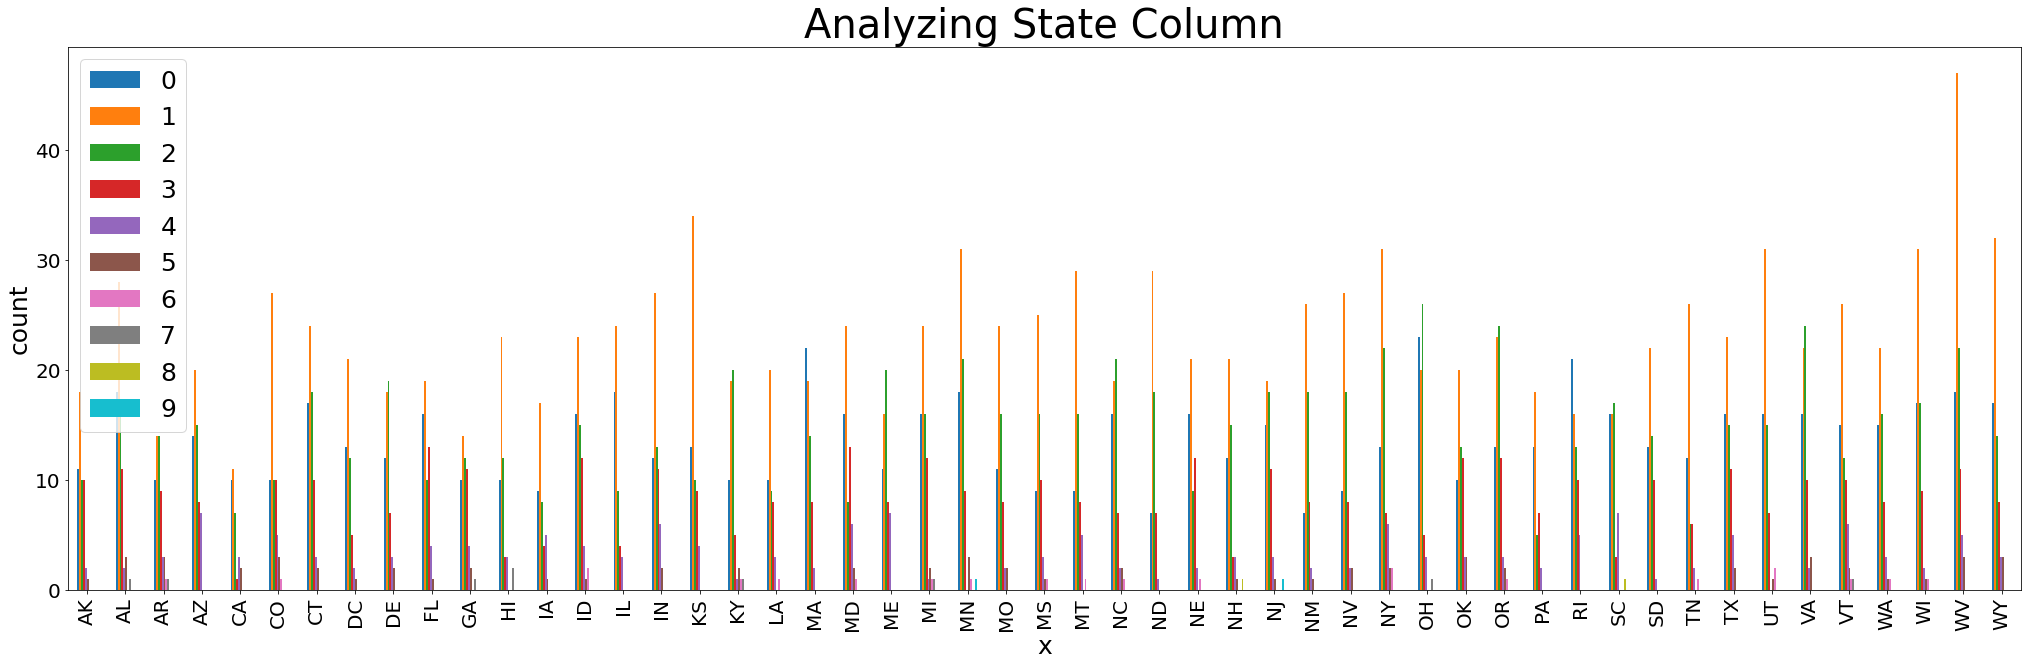

In [ ]:
diff_bar('State','Customer service calls')

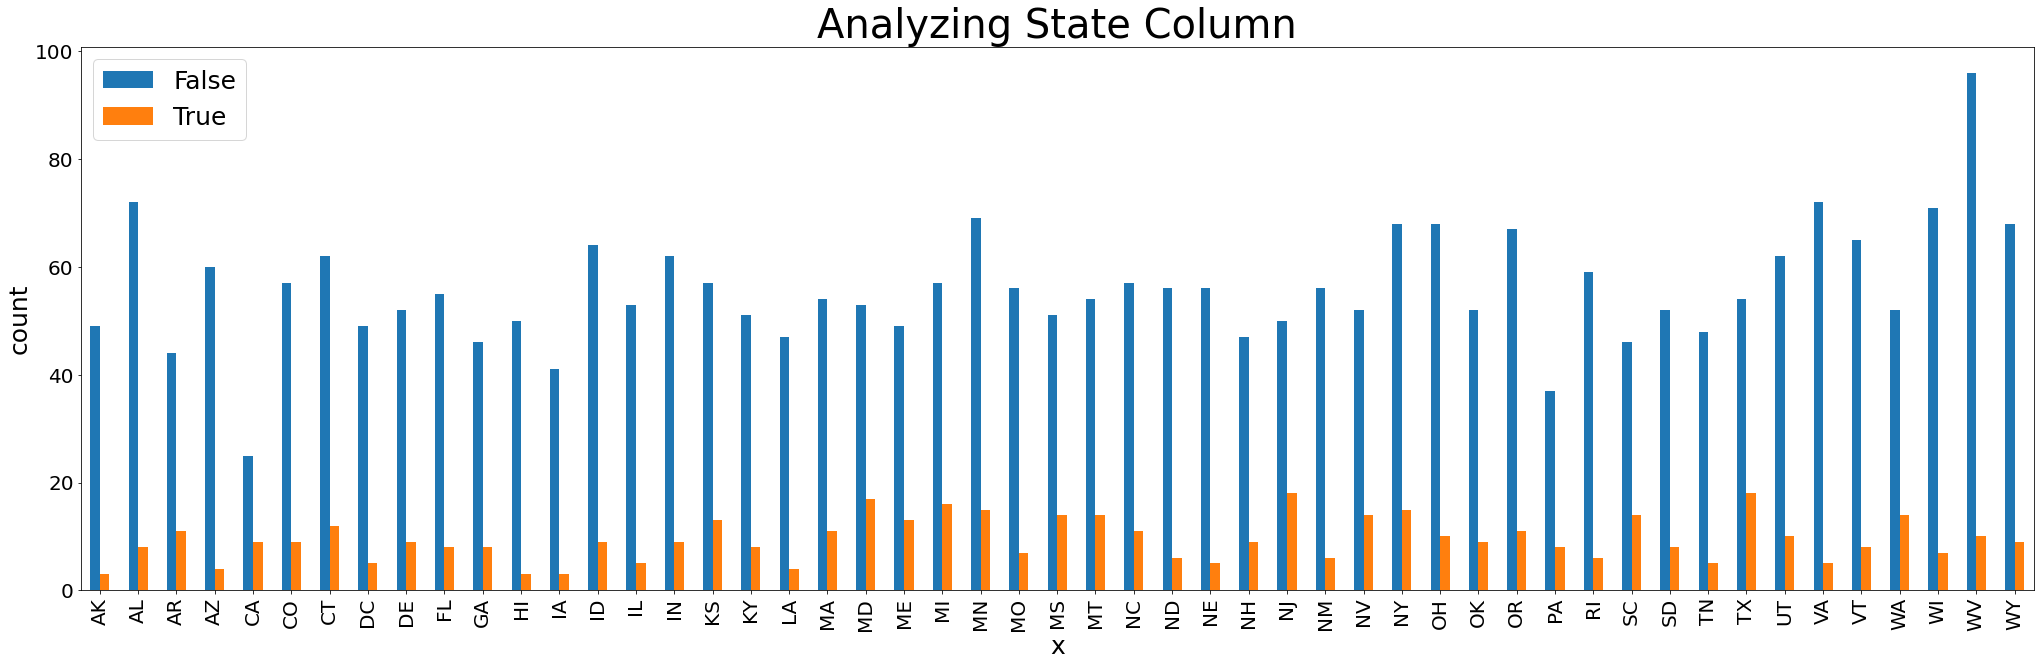

In [ ]:
diff_bar('State','Churn')

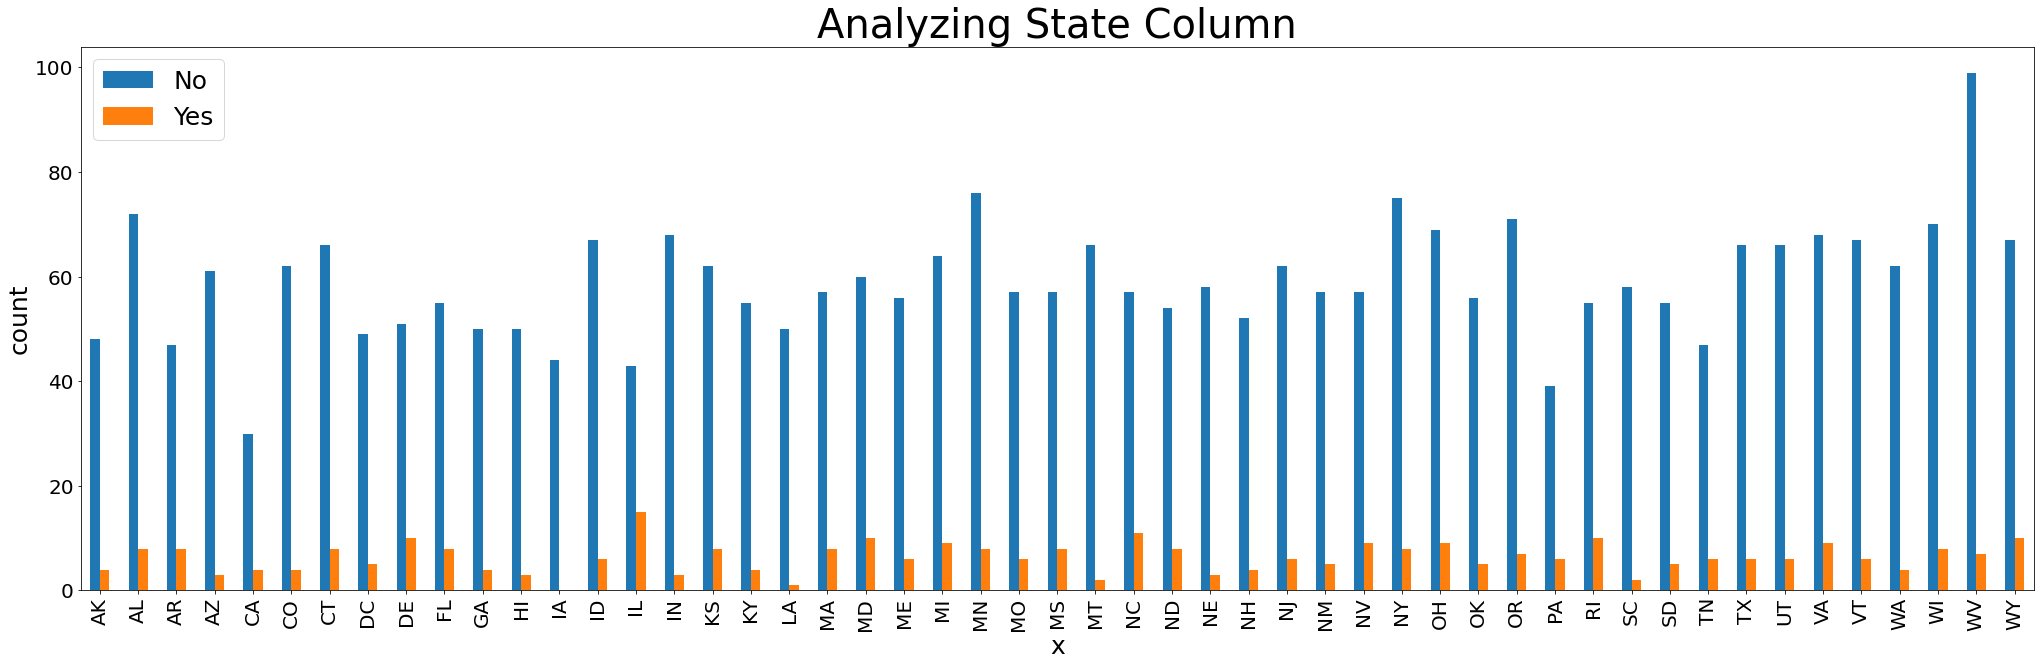

In [ ]:
diff_bar('State','International plan') 

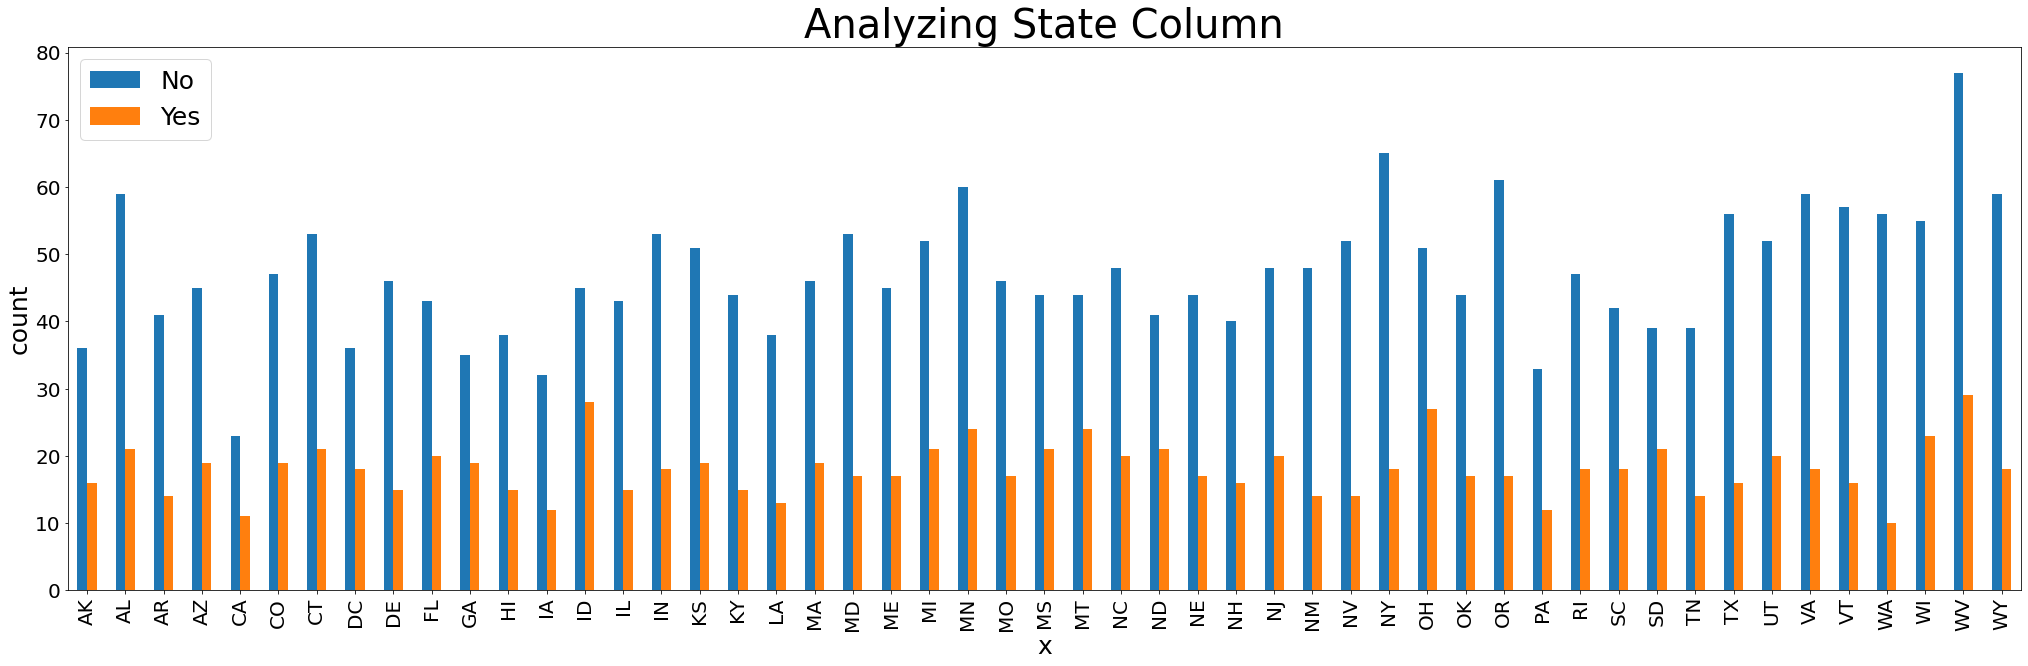

In [ ]:
diff_bar('State','Voice mail plan')

#By putting Heat map and histogram simultanously we can co-relate with columns

In [ ]:
churn_data_df = tele_ch [['Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]
corr_df = churn_data_df.corr()
corr_df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


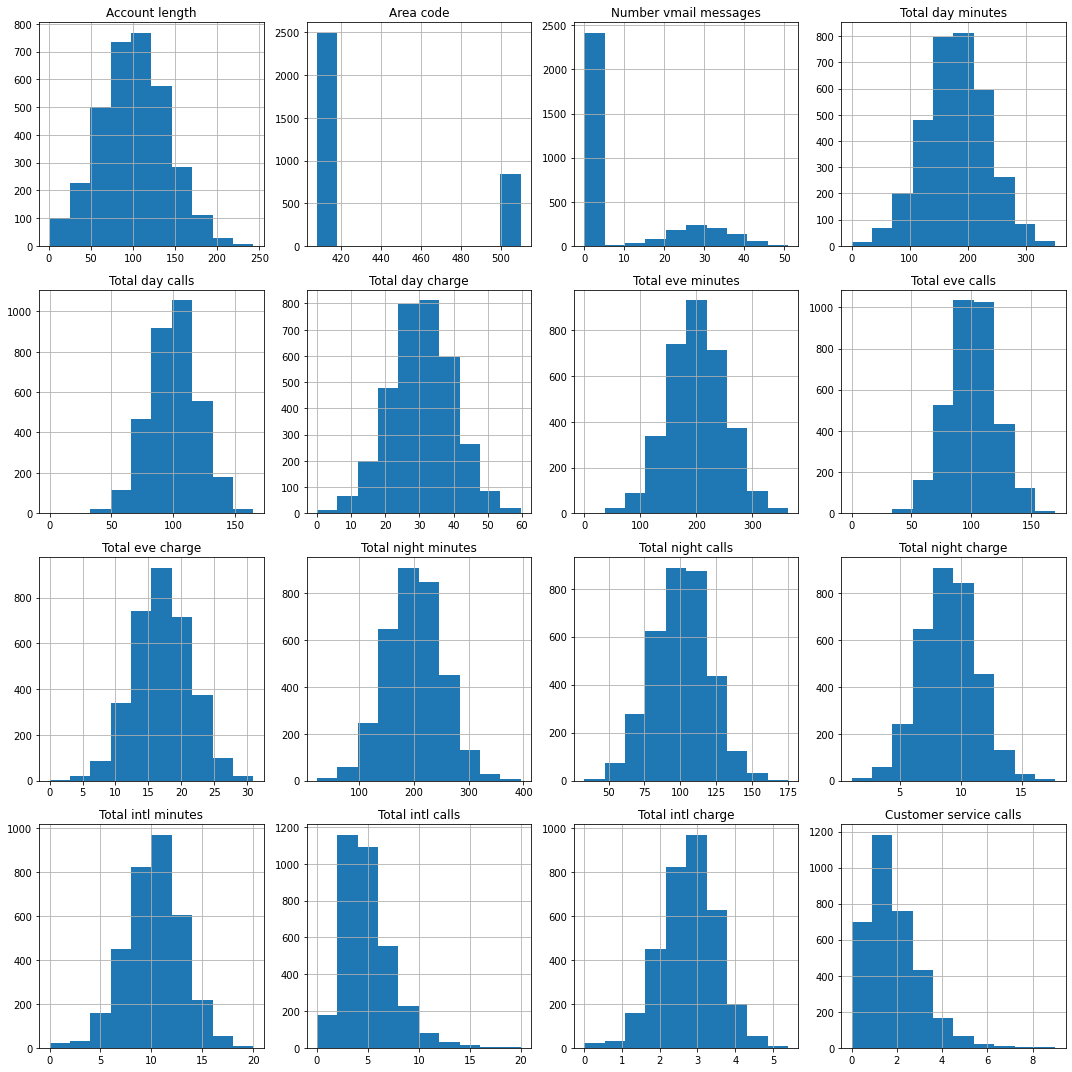

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(tele_ch,ax=ax)
plt.tight_layout();